## Analysis of Breath-holds

In this script, polynomial fits are applied to the centroid positions during the periods of breath-hold

In [1]:
import pickle

import matplotlib.pyplot as plt

import numpy as np

import scipy.signal

import time

%matplotlib notebook


In [2]:
with open('Cine Pickles/patient_numbers.pickle', 'rb') as handle:
    pat_nums = pickle.load(handle)
    
with open('Cine Pickles/pat_num_2_frac_nums.pickle', 'rb') as handle:
    pat_num_2_frac_nums = pickle.load(handle)

------>1 , 1
100
0.79
12
12
12
12
12
12
12
[]


<IPython.core.display.Javascript object>


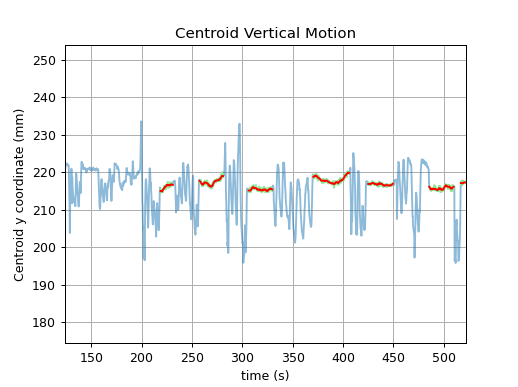

------>1 , 2
100
0.79
20
20
20
20
20
20
20
[]


<IPython.core.display.Javascript object>


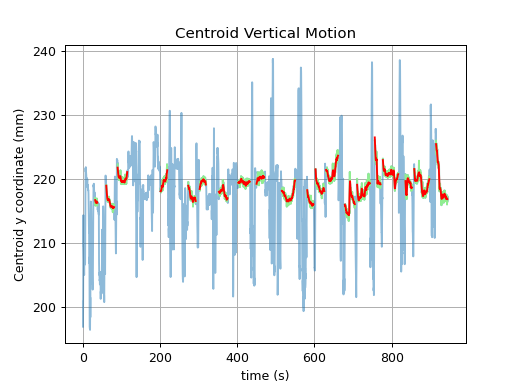

------>1 , 3
100
0.79
11
11
11
11
11
11
11
[]


<IPython.core.display.Javascript object>


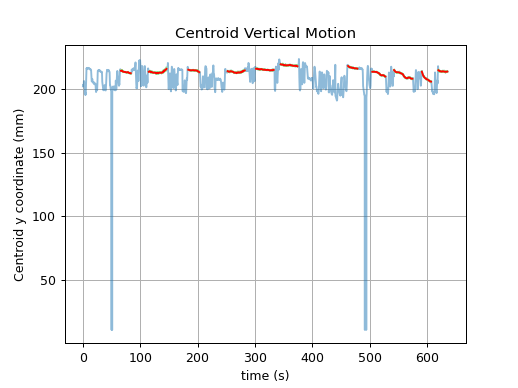

------>1 , 4
100
0.79
14
14
14
14
14
14
14
[]


<IPython.core.display.Javascript object>


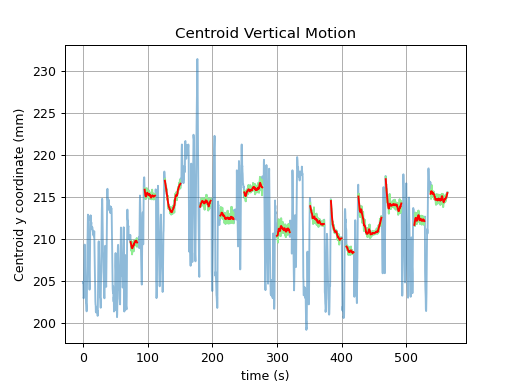

------>1 , 5
100
0.79
10
10
10
10
10
10
10
[]


<IPython.core.display.Javascript object>


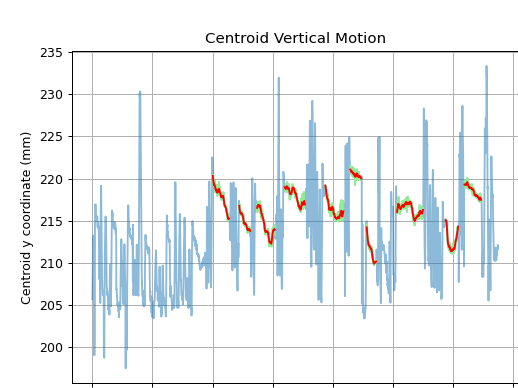

------>2 , 1
144
0.81
26
26
26
26
26
26
26
[]


<IPython.core.display.Javascript object>


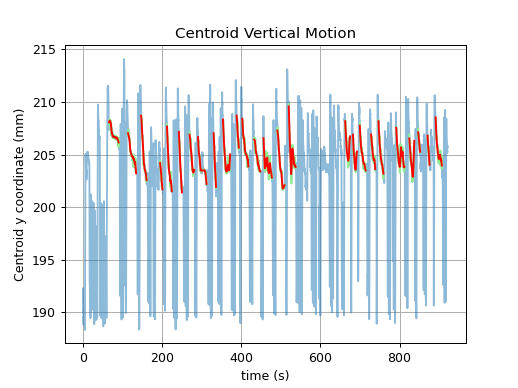

------>2 , 2
144
0.81
19
19
19
19
19
19
19
[]


<IPython.core.display.Javascript object>


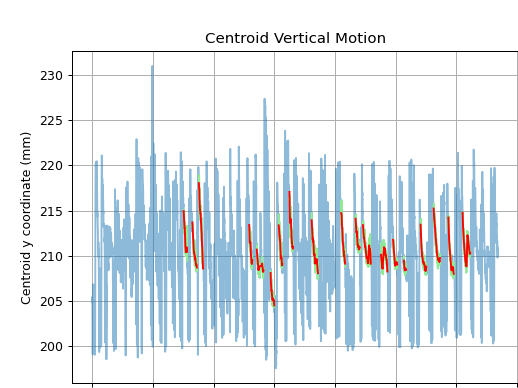

------>2 , 3
144
0.81
12
12
12
12
12
12
12
[]


<IPython.core.display.Javascript object>


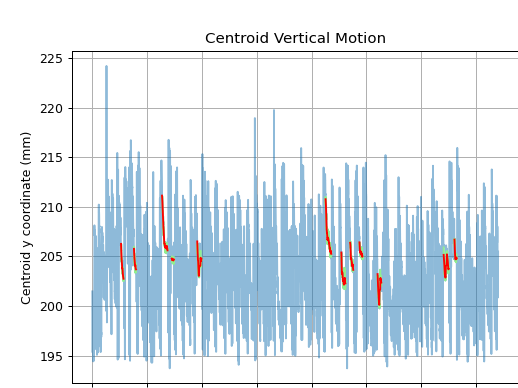

------>2 , 4
144
0.81
27
27
27
27
27
27
27
[]


<IPython.core.display.Javascript object>


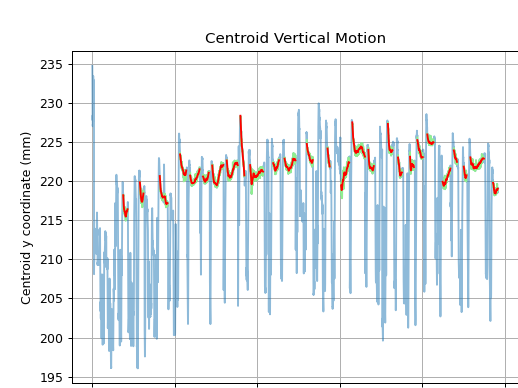

------>3 , 1
144
0.81
17
17
17
17
17
17
17
[]


<IPython.core.display.Javascript object>


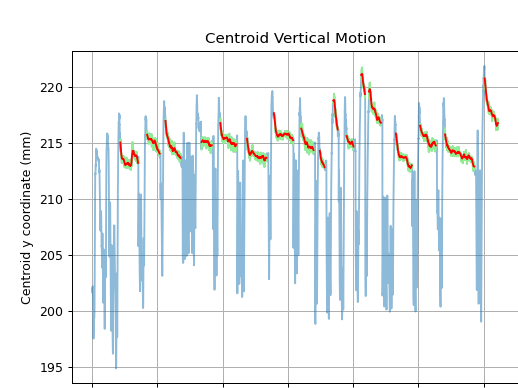

------>3 , 2
144
0.81
16
16
16
16
16
16
16
[]


<IPython.core.display.Javascript object>


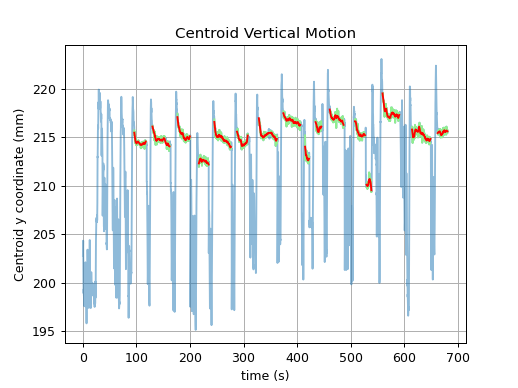

------>3 , 3
144
0.81
18
18
18
18
18
18
18
[]


<IPython.core.display.Javascript object>


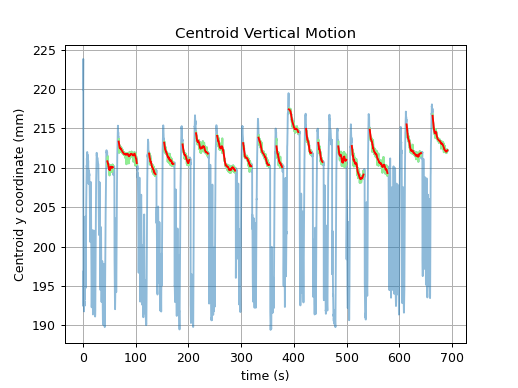

------>3 , 4
144
0.81
18
18
18
18
18
18
18
[]


<IPython.core.display.Javascript object>


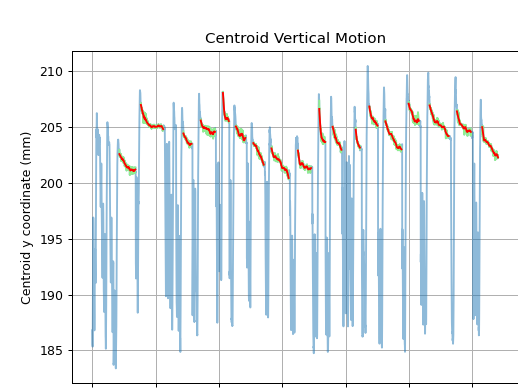

------>3 , 5
144
0.81
20
20
20
20
20
20
20
[]


<IPython.core.display.Javascript object>


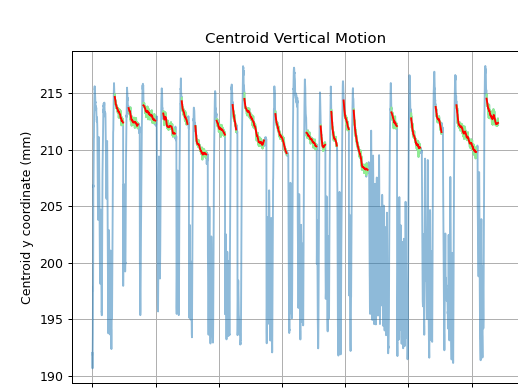

------>4 , 1
112
0.6
20
20
20
20
20
20
20
[]


<IPython.core.display.Javascript object>


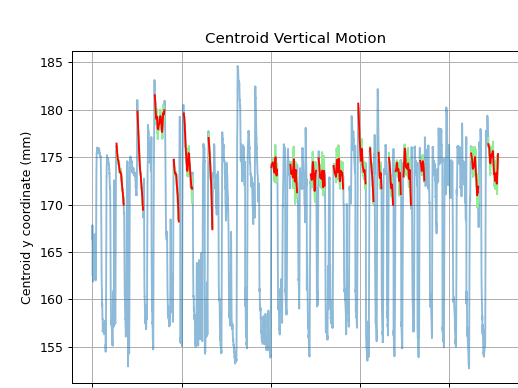

------>4 , 2
112
0.6
7
7
7
7
7
7
7
[]


<IPython.core.display.Javascript object>


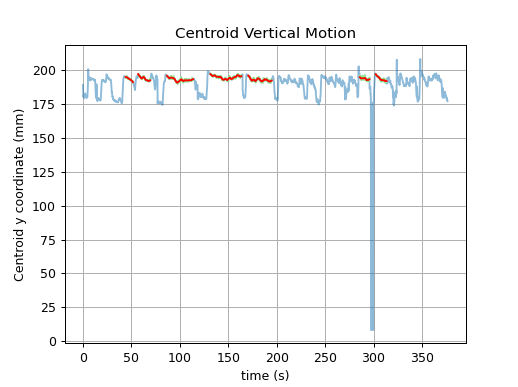

------>4 , 3
112
0.6
20
20
20
20
20
20
20
[]


<IPython.core.display.Javascript object>


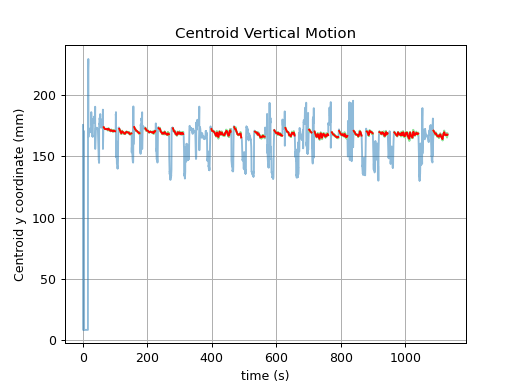

------>4 , 4
112
0.6
11
11
11
11
11
11
11
[]


<IPython.core.display.Javascript object>


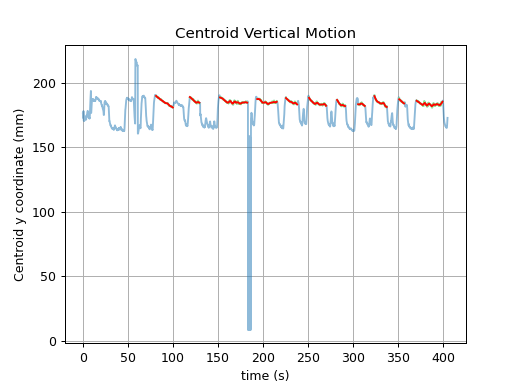

------>4 , 5
112
0.6
30
30
30
30
30
30
30
[]


<IPython.core.display.Javascript object>


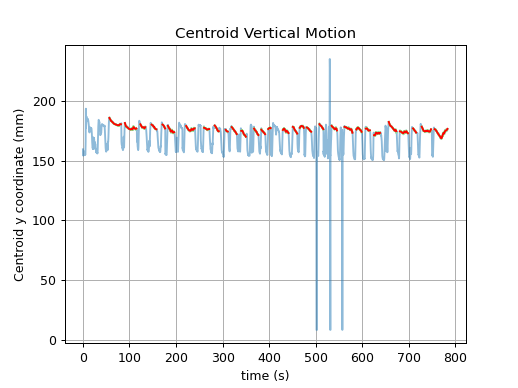

------>4 , 6
112
0.6
9
9
9
9
9
9
9
[]


<IPython.core.display.Javascript object>


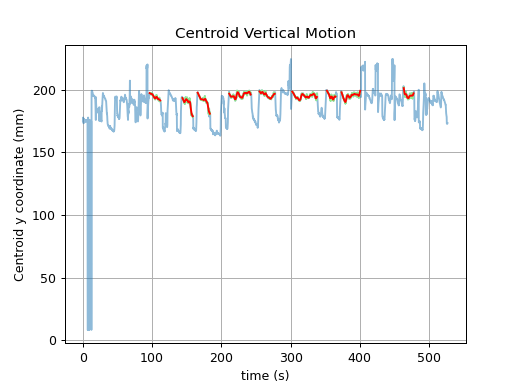

------>4 , 7
112
0.6
4
4
4
4
4
4
4
[]


C:\Users\adam\AppData\Local\Temp/ipykernel_18836/343152165.py:255: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


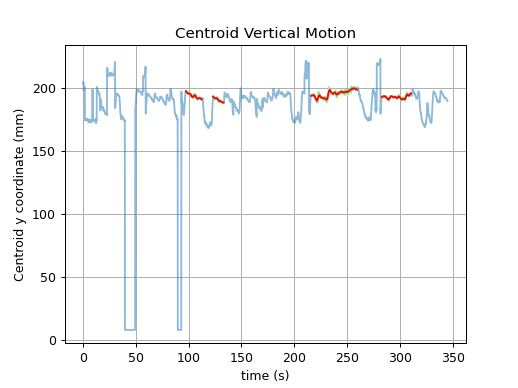

------>4 , 8
112
0.6
17
17
17
17
17
17
17
[]


<IPython.core.display.Javascript object>


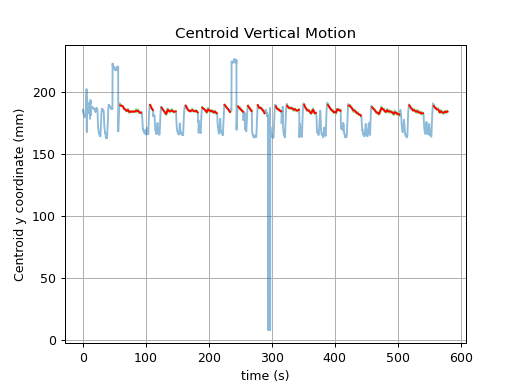

------>5 , 1
144
0.81
19
19
19
19
19
19
19
[]


<IPython.core.display.Javascript object>


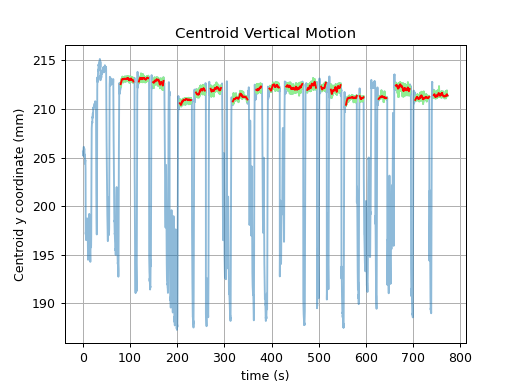

------>5 , 2
144
0.81
21
21
21
21
21
21
21
[]


<IPython.core.display.Javascript object>


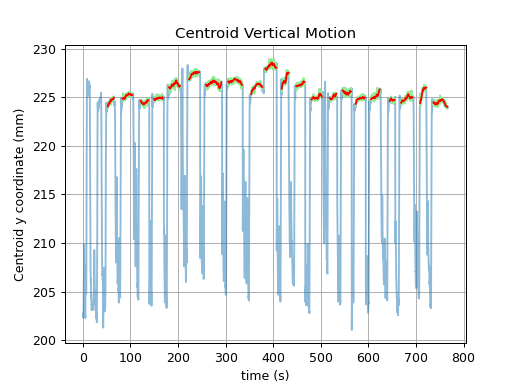

------>5 , 3
144
0.81
20
20
20
20
20
20
20
[]


<IPython.core.display.Javascript object>

------>5 , 4
144
0.81
21
21
21
21
21
21
21
[]


<IPython.core.display.Javascript object>

------>5 , 5
144
0.81
19
19
19
19
19
19
19
[]


<IPython.core.display.Javascript object>


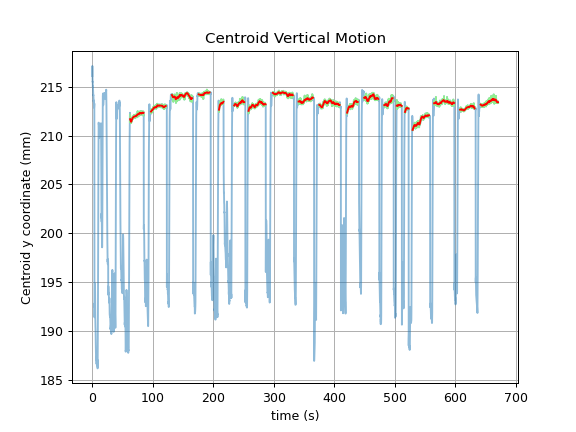

------>6 , 1
100
0.79
39
39
39
39
39
39
39
[]


<IPython.core.display.Javascript object>


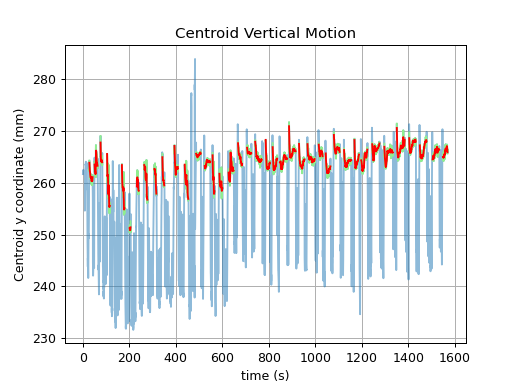

------>6 , 2
100
0.79
20
20
20
20
20
20
20
[]


<IPython.core.display.Javascript object>


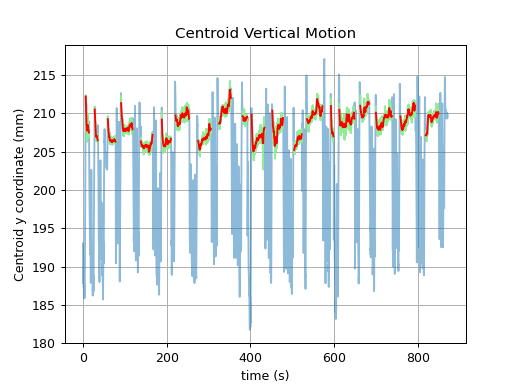

------>6 , 3
100
0.79
18
18
18
18
18
18
18
[]


<IPython.core.display.Javascript object>


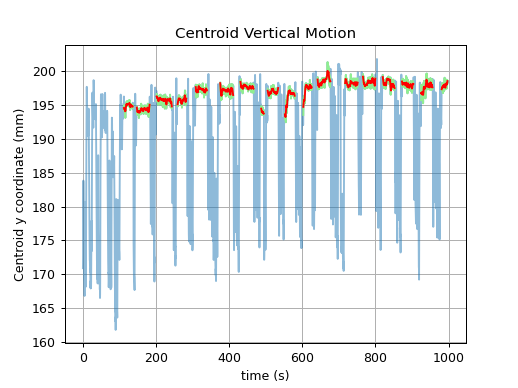

------>6 , 4
100
0.79
22
22
22
22
22
22
22
[]


<IPython.core.display.Javascript object>


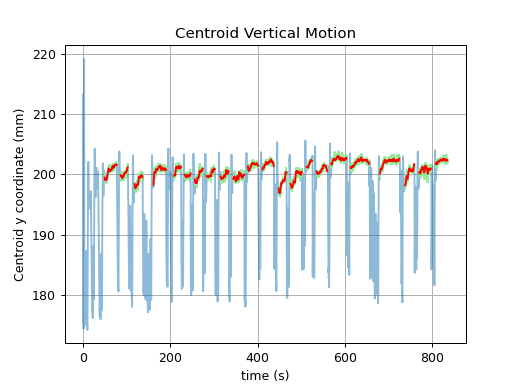

------>7 , 1
144
0.81
21
21
21
21
21
21
21
[]


<IPython.core.display.Javascript object>


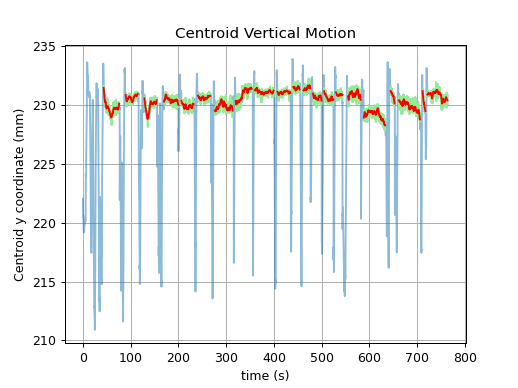

------>7 , 2
144
0.81
18
18
18
18
18
18
18
[]


<IPython.core.display.Javascript object>


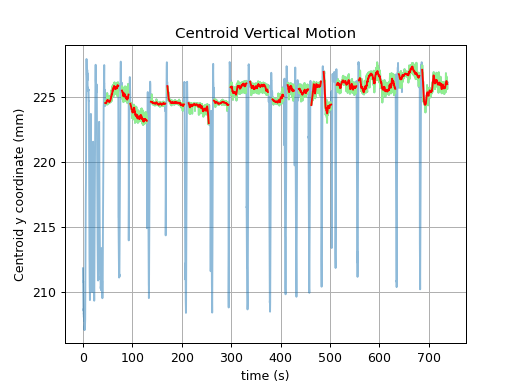

------>7 , 3
112
0.6
18
18
18
18
18
18
18
[]


<IPython.core.display.Javascript object>


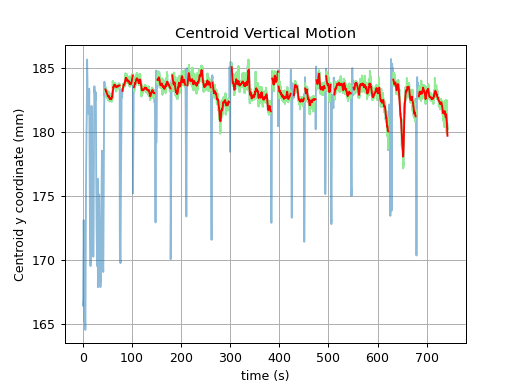

------>7 , 4
144
0.81
18
18
18
18
18
18
18
[]


<IPython.core.display.Javascript object>


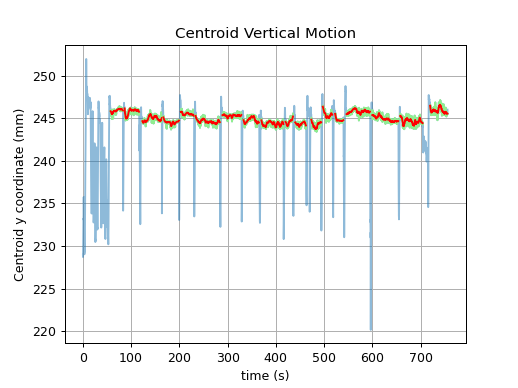

------>7 , 5
144
0.81
18
18
18
18
18
18
18
[]


<IPython.core.display.Javascript object>


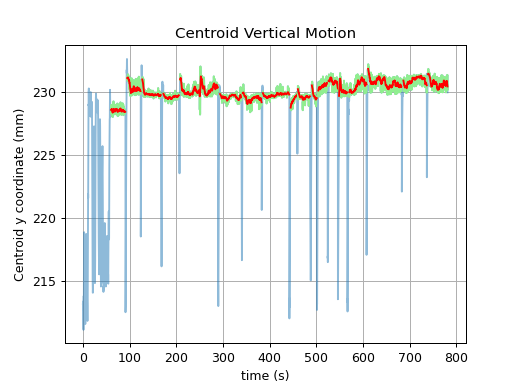

------>8 , 1
144
0.81
24
24
24
24
24
24
24
[]


<IPython.core.display.Javascript object>


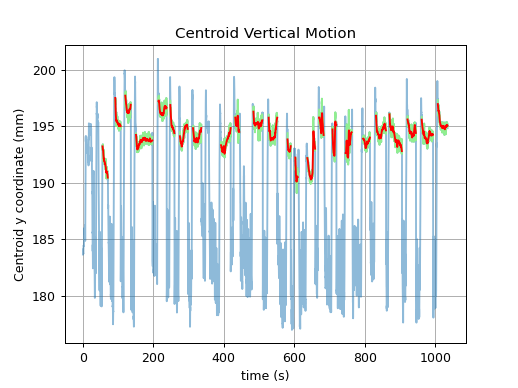

------>8 , 2
144
0.81
26
26
26
26
26
26
26
[]


<IPython.core.display.Javascript object>

------>8 , 3
144
0.81
22
22
22
22
22
22
22
[]


<IPython.core.display.Javascript object>

------>8 , 4
112
0.6
19
19
19
19
19
19
19
[]


<IPython.core.display.Javascript object>

------>8 , 5
112
0.6
19
19
19
19
19
19
19
[]


<IPython.core.display.Javascript object>

------>9 , 1
144
0.81
23
23
23
23
23
23
23
[]


<IPython.core.display.Javascript object>

------>9 , 2
112
0.6
17
17
17
17
17
17
17
[]


<IPython.core.display.Javascript object>

------>9 , 3
144
0.81
17
17
17
17
17
17
17
[]


<IPython.core.display.Javascript object>

------>9 , 4
144
0.81
18
18
18
18
18
18
18
[]


<IPython.core.display.Javascript object>

------>9 , 5
144
0.81
21
21
21
21
21
21
21
[]


<IPython.core.display.Javascript object>

------>10 , 1
144
0.81
28
28
28
28
28
28
28
[]


<IPython.core.display.Javascript object>


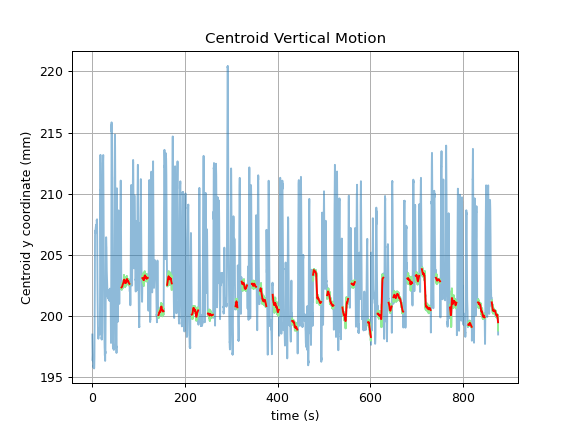

------>10 , 2
144
0.81
18
18
18
18
18
18
18
[]


<IPython.core.display.Javascript object>


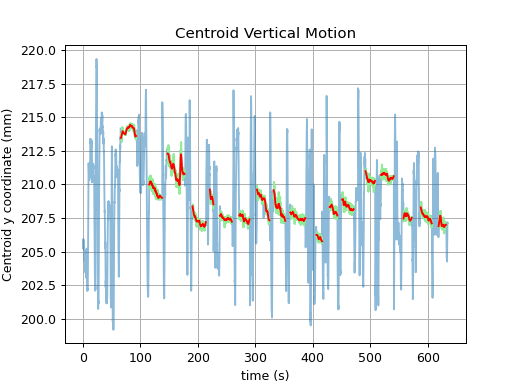

------>10 , 3
144
0.81
18
18
18
18
18
18
18
[]


<IPython.core.display.Javascript object>


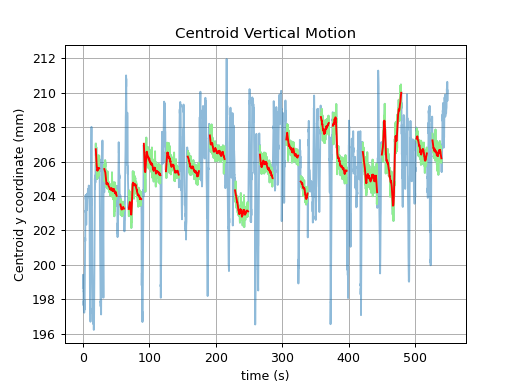

------>10 , 4
112
0.6
19
19
19
19
19
19
19
[]


<IPython.core.display.Javascript object>


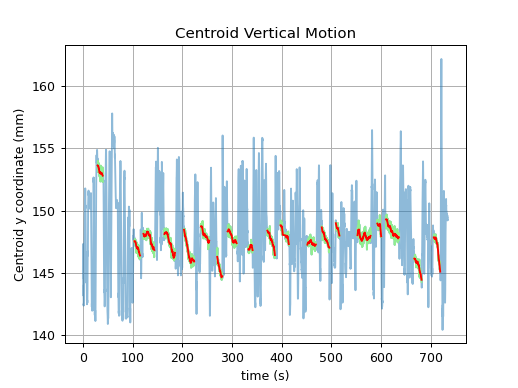

------>10 , 5
112
0.6
18
18
18
18
18
18
18
[]


<IPython.core.display.Javascript object>


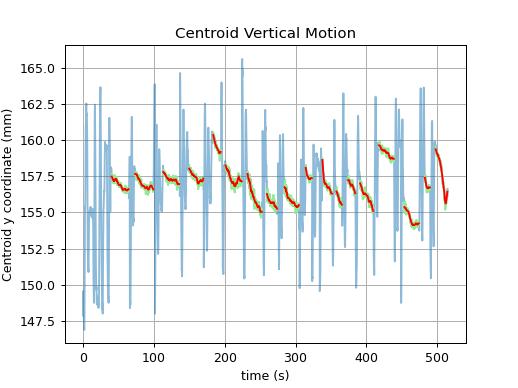

------>12 , 1
144
0.81
37
37
37
37
37
37
37
[]


<IPython.core.display.Javascript object>


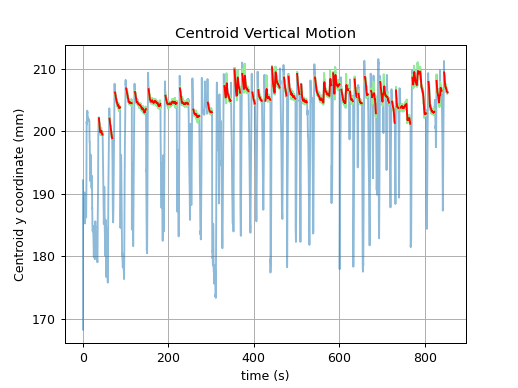

------>12 , 2
144
0.81
28
28
28
28
28
28
28
[]


<IPython.core.display.Javascript object>


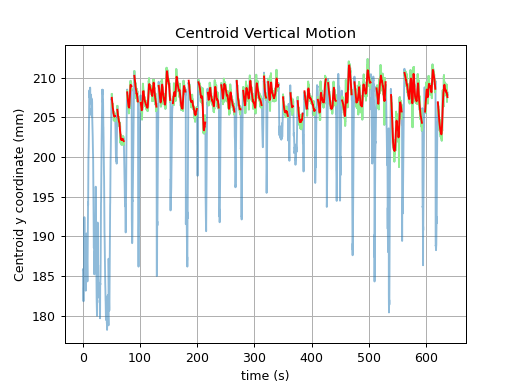

------>12 , 3
144
0.81
25
25
25
25
25
25
25
[]


<IPython.core.display.Javascript object>


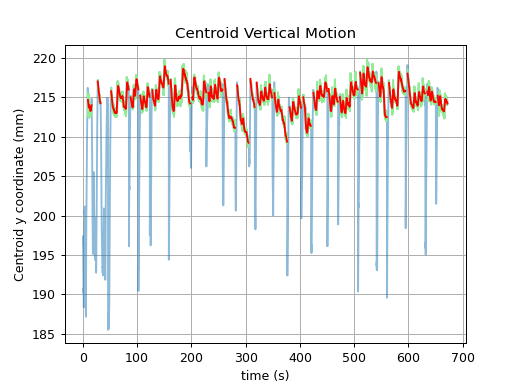

------>12 , 4
144
0.81
23
23
23
23
23
23
23
[]


<IPython.core.display.Javascript object>


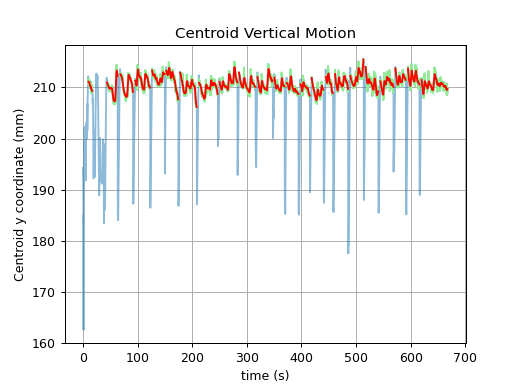

------>12 , 5
144
0.81
25
25
25
25
25
25
25
[]


<IPython.core.display.Javascript object>


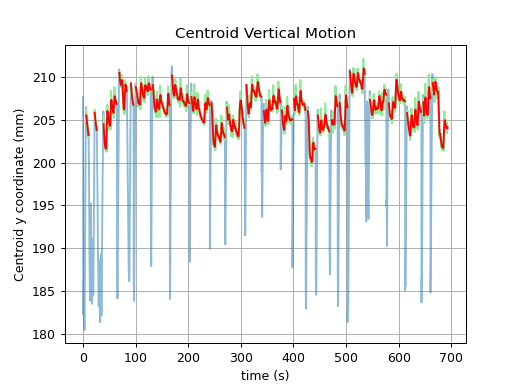

In [3]:
for pat_num in pat_nums:

    for frac_num in range(1, pat_num_2_frac_nums[pat_num] + 1):
        
        

        print( '------>' + str(pat_num) + ' , ' + str(frac_num))
        
        
        cine_video_name = 'pat_' + str(pat_num) + '_frac_' + str(frac_num) + '.ogv'
        
        
        

        #cine_video_name = 'pat_9_frac_4.ogv'

        #cine_video_name = 'ZZZZZ, Modus4D  - Fraction3 - 1.ogv'


        with open('Cine Pickles/' + cine_video_name + '/cine_res.pickle', 'rb') as handle:
            cine_res = pickle.load(handle)

        with open('Cine Pickles/' + cine_video_name + '/cine_fps.pickle', 'rb') as handle:
            cine_fps = pickle.load(handle)

        with open('Cine Pickles/' + cine_video_name + '/MR_res.pickle', 'rb') as handle:
            MR_res = pickle.load(handle)

        print(MR_res)

        with open('Cine Pickles/' + cine_video_name + '/MR_pixel.pickle', 'rb') as handle:
            MR_pixel = pickle.load(handle)

        with open('Cine Pickles/MR_res_2_pixel_size.pickle', 'rb') as handle:
            MR_res_2_pixel_size = pickle.load(handle)



        pixel_size = MR_res_2_pixel_size[MR_res]

        print(pixel_size)





        #============================================================================



        with open('Cine Pickles/' + cine_video_name + '/frame_nums.pickle', 'rb') as handle:
            frame_nums = pickle.load(handle)

        with open('Cine Pickles/' + cine_video_name + '/Total_Frames_Centroids_Original.pickle', 'rb') as handle:
            Total_Frames_Centroids_Original = pickle.load(handle)

        with open('Cine Pickles/' + cine_video_name + '/Total_Areas_Original.pickle', 'rb') as handle:
            Total_Areas_Original = pickle.load(handle)

        with open('Cine Pickles/' + cine_video_name + '/Analysising Breath-holds/breath_hold_frames_split.pickle', 'rb') as handle:
            breath_hold_frames_split = pickle.load(handle)

        with open('Cine Pickles/' + cine_video_name + '/Analysising Breath-holds/breath_hold_y_centroids_split.pickle', 'rb') as handle:
            breath_hold_y_centroids_split = pickle.load(handle)

        with open('Cine Pickles/' + cine_video_name + '/Analysising Breath-holds/breath_hold_x_centroids_split.pickle', 'rb') as handle:
            breath_hold_x_centroids_split = pickle.load(handle)

        with open('Cine Pickles/' + cine_video_name + '/Analysising Breath-holds/breath_hold_areas_split.pickle', 'rb') as handle:
            breath_hold_areas_split = pickle.load(handle)

        with open('Cine Pickles/' + cine_video_name + '/Analysising Breath-holds/breath_hold_gating_states_split.pickle', 'rb') as handle:
            breath_hold_gating_states_split = pickle.load(handle)

        with open('Cine Pickles/' + cine_video_name + '/Analysising Breath-holds/breath_hold_beam_states_split.pickle', 'rb') as handle:
            breath_hold_beam_states_split = pickle.load(handle)

        with open('Cine Pickles/' + cine_video_name + '/Analysising Breath-holds/breath_hold_confidences_split.pickle', 'rb') as handle:
            breath_hold_confidences_split = pickle.load(handle)





        print(len(breath_hold_frames_split))

        print(len(breath_hold_y_centroids_split))

        print(len(breath_hold_x_centroids_split))

        print(len(breath_hold_areas_split))

        print(len(breath_hold_confidences_split))

        print(len(breath_hold_gating_states_split))

        print(len(breath_hold_beam_states_split))


        number_of_breath_holds = len(breath_hold_frames_split)




        #===================================================================================







        with open('Cine Pickles/' + cine_video_name + '/error_frames_total.pickle', 'rb') as handle:
            error_frames_total = pickle.load(handle)



        indexs = []

        for breath_hold_number in range(0 , len(breath_hold_frames_split) ):

            for frame_index in range( 0 , len(breath_hold_frames_split[breath_hold_number])):

                if breath_hold_frames_split[breath_hold_number][frame_index] in error_frames_total:


                    print('uhuh')

                    print(breath_hold_number)

                    print(frame_index)

                    print(breath_hold_frames_split[breath_hold_number][frame_index])

                    indexs.append([breath_hold_number , frame_index ] )



        indexs = np.array(indexs)

        #print(indexs)          


        for i in range( 0 , len(indexs)):


            breath_hold_frames_split[indexs[i][0]] = np.delete(breath_hold_frames_split[indexs[i][0]], indexs[i][1] - i)

            breath_hold_y_centroids_split[indexs[i][0]] = np.delete(breath_hold_y_centroids_split[indexs[i][0]], indexs[i][1] - i)

            breath_hold_x_centroids_split[indexs[i][0]] = np.delete(breath_hold_x_centroids_split[indexs[i][0]], indexs[i][1] - i)

            breath_hold_areas_split[indexs[i][0]] = np.delete(breath_hold_areas_split[indexs[i][0]], indexs[i][1] - i)

            breath_hold_beam_states_split[indexs[i][0]] = np.delete(breath_hold_beam_states_split[indexs[i][0]], indexs[i][1] - i)

            breath_hold_gating_states_split[indexs[i][0]] = np.delete(breath_hold_gating_states_split[indexs[i][0]], indexs[i][1] - i)

            breath_hold_confidences_split[indexs[i][0]] = np.delete(breath_hold_confidences_split[indexs[i][0]], indexs[i][1] - i)





        #===============================================================================


        too_small_indexs = []

        for breath_hold_number in range(0 , len(breath_hold_frames_split) ):

            if len(breath_hold_frames_split[breath_hold_number]) < 2*cine_fps - 1:

                too_small_indexs.append(breath_hold_number)

        print(too_small_indexs)   


        i = 0

        for index in too_small_indexs:

            breath_hold_frames_split.pop(index - i)

            breath_hold_y_centroids_split.pop(index - i)

            breath_hold_x_centroids_split.pop(index - i)

            breath_hold_areas_split.pop(index - i)

            breath_hold_beam_states_split.pop(index - i)

            breath_hold_gating_states_split.pop(index - i)

            breath_hold_confidences_split.pop(index - i)

            i += 1


        number_of_breath_holds = len(breath_hold_frames_split) 

        #print(number_of_breath_holds)



        #===============================================================================================




        with open('Cine Pickles/' + cine_video_name + '/Analysising Breath-holds/breath_hold_frames_split.pickle', 'wb') as handle:
            pickle.dump(breath_hold_frames_split, handle, protocol=pickle.HIGHEST_PROTOCOL)



        with open('Cine Pickles/' + cine_video_name + '/Analysising Breath-holds/breath_hold_y_centroids_split.pickle', 'wb') as handle:
            pickle.dump(breath_hold_y_centroids_split, handle, protocol=pickle.HIGHEST_PROTOCOL)



        with open('Cine Pickles/' + cine_video_name + '/Analysising Breath-holds/breath_hold_x_centroids_split.pickle', 'wb') as handle:
            pickle.dump(breath_hold_x_centroids_split, handle, protocol=pickle.HIGHEST_PROTOCOL)



        with open('Cine Pickles/' + cine_video_name + '/Analysising Breath-holds/breath_hold_areas_split.pickle', 'wb') as handle:
            pickle.dump(breath_hold_areas_split, handle, protocol=pickle.HIGHEST_PROTOCOL)




        with open('Cine Pickles/' + cine_video_name + '/Analysising Breath-holds/breath_hold_beam_states_split.pickle', 'wb') as handle:
            pickle.dump(breath_hold_beam_states_split, handle, protocol=pickle.HIGHEST_PROTOCOL)



        with open('Cine Pickles/' + cine_video_name + '/Analysising Breath-holds/breath_hold_gating_states_split.pickle', 'wb') as handle:
            pickle.dump(breath_hold_gating_states_split, handle, protocol=pickle.HIGHEST_PROTOCOL)



        with open('Cine Pickles/' + cine_video_name + '/Analysising Breath-holds/breath_hold_confidences_split.pickle', 'wb') as handle:
            pickle.dump(breath_hold_confidences_split, handle, protocol=pickle.HIGHEST_PROTOCOL)




        #===========================================================






        plt.figure()

        breath_hold_numbers = []

        breath_hold_durations = []


        breath_hold_y_centroids_split_denoised = []

        breath_hold_x_centroids_split_denoised = []

        breath_hold_areas_split_denoised = []

        breath_hold_times_split = []


        plt.plot(frame_nums*(1/cine_fps),Total_Frames_Centroids_Original[:,1]*pixel_size, alpha = 0.5)




        for breath_hold_number in range(0,len(breath_hold_frames_split)):




            y = np.array(breath_hold_y_centroids_split[breath_hold_number])*pixel_size

            x = np.array(breath_hold_x_centroids_split[breath_hold_number])*pixel_size

            area = np.array(breath_hold_areas_split[breath_hold_number])*pixel_size*pixel_size

            t = np.array(breath_hold_frames_split[breath_hold_number])*(1/cine_fps)

            breath_hold_times_split.append(t)

            #x = np.array([ t,y])

            breath_hold_numbers.append(breath_hold_number)

            breath_hold_durations.append( np.max(t) - np.min(t))


            #print(len(t))

            #print(breath_hold_number)




            denoised_y = scipy.signal.savgol_filter(y, int(2.5*cine_fps - 1) , 1)

            denoised_x = scipy.signal.savgol_filter(x, int(2.5*cine_fps - 1), 1)

            denoised_area = scipy.signal.savgol_filter(area, int(2.5*cine_fps - 1), 1)



            breath_hold_y_centroids_split_denoised.append(denoised_y)

            breath_hold_x_centroids_split_denoised.append(denoised_x)

            breath_hold_areas_split_denoised.append(denoised_area)




            plt.plot(t, y, color = 'lightgreen')

            plt.plot(t, denoised_y, color = 'red')

        #plt.scatter(frame_nums*0.125, Total_Areas_Original, alpha = 0.2)



        plt.title('Centroid Vertical Motion')
        plt.ylabel('Centroid y coordinate (mm)')
        plt.xlabel('time (s)')



        plt.grid()




        with open('Cine Pickles/' + cine_video_name + '/Analysising Breath-holds/breath_hold_durations.pickle', 'wb') as handle:
            pickle.dump(breath_hold_durations, handle, protocol=pickle.HIGHEST_PROTOCOL)



        with open('Cine Pickles/' + cine_video_name + '/Analysising Breath-holds/breath_hold_y_centroids_split_denoised.pickle', 'wb') as handle:
            pickle.dump(breath_hold_y_centroids_split_denoised, handle, protocol=pickle.HIGHEST_PROTOCOL)



        with open('Cine Pickles/' + cine_video_name + '/Analysising Breath-holds/breath_hold_x_centroids_split_denoised.pickle', 'wb') as handle:
            pickle.dump(breath_hold_x_centroids_split_denoised, handle, protocol=pickle.HIGHEST_PROTOCOL)



        with open('Cine Pickles/' + cine_video_name + '/Analysising Breath-holds/breath_hold_areas_split_denoised.pickle', 'wb') as handle:
            pickle.dump(breath_hold_areas_split_denoised, handle, protocol=pickle.HIGHEST_PROTOCOL)



        with open('Cine Pickles/' + cine_video_name + '/Analysising Breath-holds/breath_hold_times_split.pickle', 'wb') as handle:
            pickle.dump(breath_hold_times_split, handle, protocol=pickle.HIGHEST_PROTOCOL)









        ###########===============================================================================




        long_breath_hold_numbers = np.where(np.array(breath_hold_durations) > 5)[0]

        #print(long_breath_hold_numbers)

        long_breath_hold_mask = [ breath_hold_number in long_breath_hold_numbers for breath_hold_number in range(0, number_of_breath_holds)]

        #long_breath_hold_mask[0] = False

        long_breath_hold_frames_split = (np.array(breath_hold_frames_split, dtype = 'object'))[long_breath_hold_mask]


        with open('Cine Pickles/' + cine_video_name + '/Analysising Breath-holds/long_breath_hold_frames_split.pickle', 'wb') as handle:
            pickle.dump(long_breath_hold_frames_split, handle, protocol=pickle.HIGHEST_PROTOCOL)
            
            
        long_breath_hold_durations = (np.array(breath_hold_durations, dtype = 'object'))[long_breath_hold_mask]


        with open('Cine Pickles/' + cine_video_name + '/Analysising Breath-holds/long_breath_hold_durations.pickle', 'wb') as handle:
            pickle.dump(long_breath_hold_durations, handle, protocol=pickle.HIGHEST_PROTOCOL)




        long_breath_hold_x_centroids_split_denoised = (np.array(breath_hold_x_centroids_split_denoised, dtype = 'object'))[long_breath_hold_mask]

        with open('Cine Pickles/' + cine_video_name + '/Analysising Breath-holds/long_breath_hold_x_centroids_split_denoised.pickle', 'wb') as handle:
            pickle.dump(long_breath_hold_x_centroids_split_denoised, handle, protocol=pickle.HIGHEST_PROTOCOL)

        long_breath_hold_y_centroids_split_denoised = (np.array(breath_hold_y_centroids_split_denoised, dtype = 'object'))[long_breath_hold_mask]

        with open('Cine Pickles/' + cine_video_name + '/Analysising Breath-holds/long_breath_hold_y_centroids_split_denoised.pickle', 'wb') as handle:
            pickle.dump(long_breath_hold_y_centroids_split_denoised, handle, protocol=pickle.HIGHEST_PROTOCOL)

        long_breath_hold_areas_split = (np.array(breath_hold_areas_split, dtype = 'object'))[long_breath_hold_mask]

        with open('Cine Pickles/' + cine_video_name + '/Analysising Breath-holds/long_breath_hold_areas_split.pickle', 'wb') as handle:
            pickle.dump(long_breath_hold_areas_split, handle, protocol=pickle.HIGHEST_PROTOCOL)

        long_breath_hold_confidences_split = (np.array(breath_hold_confidences_split, dtype = 'object'))[long_breath_hold_mask]

        with open('Cine Pickles/' + cine_video_name + '/Analysising Breath-holds/long_breath_hold_confidences_split.pickle', 'wb') as handle:
            pickle.dump(long_breath_hold_confidences_split, handle, protocol=pickle.HIGHEST_PROTOCOL)
            

        long_breath_hold_beam_states_split = (np.array(breath_hold_beam_states_split, dtype = 'object'))[long_breath_hold_mask]

        with open('Cine Pickles/' + cine_video_name + '/Analysising Breath-holds/long_breath_hold_beam_states_split.pickle', 'wb') as handle:
            pickle.dump(long_breath_hold_beam_states_split, handle, protocol=pickle.HIGHEST_PROTOCOL)    
            
            
        long_breath_hold_gating_states_split = (np.array(breath_hold_gating_states_split, dtype = 'object'))[long_breath_hold_mask]

        with open('Cine Pickles/' + cine_video_name + '/Analysising Breath-holds/long_breath_hold_gating_states_split.pickle', 'wb') as handle:
            pickle.dump(long_breath_hold_gating_states_split, handle, protocol=pickle.HIGHEST_PROTOCOL)            



        #plt.show()

        #time.sleep(2)


        #=====================================================================================
